In [1]:
## Import Necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning.
## Handling Missing Values.
#### 1. Handling missing values.
#### 2. Handling Duplicates.
#### 3. Check data type
#### 4. Understand the dataset.

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
## Check all the categories.
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [11]:
## Check Missing Values.
## These are the features with nan values.
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
# Statistics on numerical columns (NULL Cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values.
#### 1. Impute Median Value for Age Column.
#### 2. Impute Mode for type of Contract.
#### 3. Impute Median for Duration of Pitch.
#### 4. Impute Mode for NumberOfFollowup as it is descrete feature.
#### 5. Impute Mode for PreferredPropertyStar.
#### 6. Impute Median for NumberOfTrips.
#### 7. Impute Mode for NumberOfChildrenVisiting.
#### 8. Impute Median for MonthlyIncome.

In [28]:
## Age
df.Age.fillna(df.Age.median(), inplace = True)

## Type of contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)

## Duration of pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

## Number of followup
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

## Number of preferred property star.
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

## Number of trips.
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

## Number of children visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

## Monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [30]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [32]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [34]:
df.drop('CustomerID', axis=1, inplace=True)

## Feature Engineering.
### Feature Extraction.

In [38]:
## Create new column for feature.
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [44]:
## Get all the numeric features.
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of numerical features:', len(num_feature))

Num of numerical features: 12


In [46]:
## Categorical features.
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of categorical features:', len(cat_feature))

Num of categorical features: 6


In [49]:
## Discrete features.
discrete_features = [feature for feature in num_feature if len(df[feature].unique())<=25]
print('Number of discrete features:', len(discrete_features))

Number of discrete features: 9


In [55]:
## Continuous features.
continuous_features = [feature for feature in num_feature if feature not in discrete_features]
print('Number of continuous features:', len(continuous_features))

Number of continuous features: 3


## Train Test Split And Model Training.

In [58]:
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [60]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [62]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [64]:
## Seperate dataset into train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [72]:
## Create column transformer with 3 types of transformers.
cat_features = X.select_dtypes(include='O').columns
num_features = X.select_dtypes(exclude='O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
        [
            ('OneHotEncoder', oh_transformer, cat_features),
            ('StandardScaler', numeric_transformer, num_features)
        ]
)



In [74]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [76]:
## Applying transformation in training(fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [78]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [80]:
## Apply transformation on test data(transform)
X_test = preprocessor.transform(X_test)

In [82]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

## Random Forest Classifier Training.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,   \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [89]:
models = {

    "random forest" : RandomForestClassifier()
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## Train Model

    ## Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_curve = roc_auc_score(y_train, y_train_pred)


    ## Test set performance.
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_curve = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}". format(model_train_accuracy))
    print("- F1 score: {:.4f}". format(model_train_f1))
    print("- Precision: {:.4f}". format(model_train_precision))
    print("- Recall: {:.4f}". format(model_train_recall))
    print("- ROC AUC Curve: {:.4f}". format(model_train_rocauc_curve))


    print('-----------------------------------------------------------')

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}". format(model_test_accuracy))
    print("- F1 Score: {:.4f}". format(model_test_f1))
    print("- Precision: {:.4f}". format(model_test_precision))
    print("- Recall: {:.4f}". format(model_test_recall))
    print("- ROC AUC Score: {:.4f}". format(model_test_rocauc_curve))

    print('='*35)
    print('\n')

random forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
Recall: 1.0000
- ROC AUC Curve: 1.0000
-----------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.9254
- F1 Score: 0.9192
- Precision: 0.9683
- Recall: 0.6387
- ROC AUC Score: 0.8168




## Try with some more models.

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,   \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [96]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random forest" : RandomForestClassifier()
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## Train Model

    ## Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_curve = roc_auc_score(y_train, y_train_pred)


    ## Test set performance.
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_curve = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}". format(model_train_accuracy))
    print("- F1 score: {:.4f}". format(model_train_f1))
    print("- Precision: {:.4f}". format(model_train_precision))
    print("- Recall: {:.4f}". format(model_train_recall))
    print("- ROC AUC Curve: {:.4f}". format(model_train_rocauc_curve))


    print('-----------------------------------------------------------')

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}". format(model_test_accuracy))
    print("- F1 Score: {:.4f}". format(model_test_f1))
    print("- Precision: {:.4f}". format(model_test_precision))
    print("- Recall: {:.4f}". format(model_test_recall))
    print("- ROC AUC Score: {:.4f}". format(model_test_rocauc_curve))

    print('='*35)
    print('\n')

Logistic Regression
Model Performance for Training Set
- Accuracy: 0.8460
- F1 score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- ROC AUC Curve: 0.6368
-----------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.8364
- F1 Score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- ROC AUC Score: 0.6307


Decision Tree
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Curve: 1.0000
-----------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.9223
- F1 Score: 0.9210
- Precision: 0.8286
- Recall: 0.7592
- ROC AUC Score: 0.8605


Random forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Curve: 1.0000
-----------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.9274
- F1 Score: 0.9214
- Precision: 0.9762
- Recall: 0.6440


## Hyperparameter Training.

In [99]:
rf_params = {"max_depth" : [5, 8, 15, None, 10],
             "max_features" : [5, 7, "auto", 8],
             "min_samples_split" : [2, 8, 15, 20],
             "n_estimators" : [100, 200, 500, 1000]}


In [101]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [105]:
# Models list for Hyperparameter Tuning.
randomcv_models = [
                    ("RF", RandomForestClassifier(), rf_params),
    ]

In [107]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [111]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print("--------------- Best Params for {model_name}--------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------- Best Params for {model_name}--------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [113]:
models = {

    "random forest" : RandomForestClassifier(n_estimators=500, min_samples_split=2,
                                             max_features=8, max_depth=None)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) ## Train Model

    ## Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_curve = roc_auc_score(y_train, y_train_pred)


    ## Test set performance.
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_curve = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}". format(model_train_accuracy))
    print("- F1 score: {:.4f}". format(model_train_f1))
    print("- Precision: {:.4f}". format(model_train_precision))
    print("- Recall: {:.4f}". format(model_train_recall))
    print("- ROC AUC Curve: {:.4f}". format(model_train_rocauc_curve))


    print('-----------------------------------------------------------')

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}". format(model_test_accuracy))
    print("- F1 Score: {:.4f}". format(model_test_f1))
    print("- Precision: {:.4f}". format(model_test_precision))
    print("- Recall: {:.4f}". format(model_test_recall))
    print("- ROC AUC Score: {:.4f}". format(model_test_rocauc_curve))

    print('='*35)
    print('\n')

random forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Curve: 1.0000
-----------------------------------------------------------
Model Performance for Test set
- Accuracy: 0.9305
- F1 Score: 0.9257
- Precision: 0.9556
- Recall: 0.6754
- ROC AUC Score: 0.8339




## Plot ROC AUC Curve

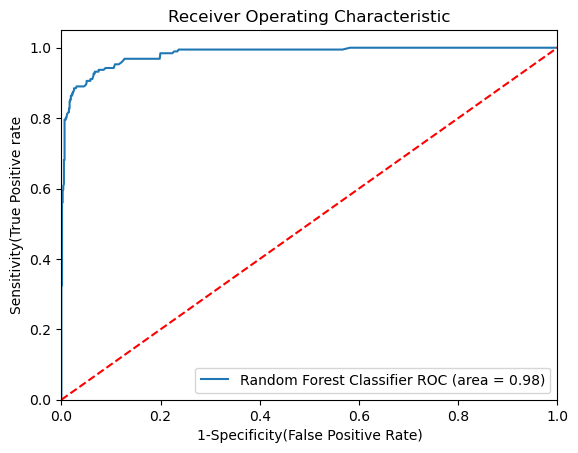

In [118]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

#Add the models to the list that you want to view on the ROC plot .
auc_models = [
    {
        'label' : 'Random Forest Classifier',
        'model' : RandomForestClassifier(n_estimators=500, min_samples_split=2,
                                             max_features=8, max_depth=None),
        'auc' : 0.8339
    }
]

# Create loop through all model
for algo in auc_models:
    model = algo['model'] # Select the model
    model.fit(X_train, y_train) # Train the model
# Compute false Positive rate and True Positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate AUC dynamically if you want instead of using predefined
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
# Plot the ROC curve with dynamic AUC calculation
    plt.plot(fpr, tpr, label=f'{algo["label"]} ROC (area = {auc_score:.2f})')
# Custom settings for the plot
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig("auc.png")
plt.show()
    